## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
!pip install -U tensorflow==2.0 --quiet

     |████████████████████████████████| 86.3MB 45kB/s 
     |████████████████████████████████| 3.8MB 40.7MB/s 
     |████████████████████████████████| 450kB 45.2MB/s 


In [0]:
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%ls /content/drive/My\ Drive/DogBreed_Classification

labels.csv.zip  sample_submission.csv.zip  test.zip  train.zip


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

In [10]:
%ls 

drive/  labels.csv  sample_data/  sample_submission.csv  test/  train/


After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [11]:
labels = pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [12]:
print('There are {} unique dog breeds in the dataset'.format(labels['breed'].nunique()))

There are 120 unique dog breeds in the dataset


In [13]:
labels['breed'].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [14]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [15]:
for label in labels['breed'].unique():
  print('{} has count {}'.format(label, labels[labels['breed']==label]['breed'].count()))

boston_bull has count 87
dingo has count 80
pekinese has count 75
bluetick has count 85
golden_retriever has count 67
bedlington_terrier has count 89
borzoi has count 75
basenji has count 110
scottish_deerhound has count 126
shetland_sheepdog has count 76
walker_hound has count 69
maltese_dog has count 117
norfolk_terrier has count 83
african_hunting_dog has count 86
wire-haired_fox_terrier has count 82
redbone has count 72
lakeland_terrier has count 99
boxer has count 75
doberman has count 74
otterhound has count 69
standard_schnauzer has count 72
irish_water_spaniel has count 78
black-and-tan_coonhound has count 77
cairn has count 106
affenpinscher has count 80
labrador_retriever has count 84
ibizan_hound has count 91
english_setter has count 83
weimaraner has count 85
giant_schnauzer has count 69
groenendael has count 82
dhole has count 76
toy_poodle has count 80
border_terrier has count 91
tibetan_terrier has count 107
norwegian_elkhound has count 95
shih-tzu has count 112
irish_te

### Get one-hot encodings of labels

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
labels['breed_int'] = le.fit_transform(labels['breed'])

In [0]:
labels_ohe = tf.keras.utils.to_categorical(labels['breed_int'], num_classes=120)

In [19]:
labels_ohe.shape

(10222, 120)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [67]:
img_height = 256
img_width = 256
from tqdm import tqdm
import cv2
x_train = []
y_train = []

for f, img in tqdm(labels.drop(columns=['breed'], axis=1).values):
  train_img = cv2.imread('./train/{}.jpg'.format(f), 1)
  train_img_resize = cv2.resize(train_img, (img_height, img_width))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:40<00:00, 250.88it/s]


In [68]:
y_train[0]

19

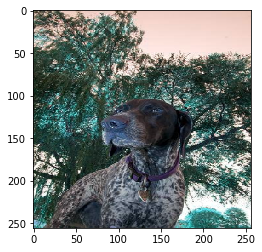

Label for the image: ['german_short-haired_pointer']


In [69]:
# printing a random image
_ = np.random.randint(500)
plt.imshow(x_train[_])
plt.show()

print('Label for the image: {}'.format(le.inverse_transform(pd.Series(y_train[_]))))

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [70]:
x_train = np.array(x_train)
x_train.shape

(10222, 256, 256, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
x_train_data, x_val_data, y_train_data, y_val_data = train_test_split(x_train, labels_ohe, test_size=0.3, random_state=10)

In [72]:
print(x_train_data.shape)
print(y_train_data.shape)

(7155, 256, 256, 3)
(7155, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
samples = pd.read_csv('sample_submission.csv')
test_img = samples['id']

Run the below code to load the test image files in x_test_feature

In [74]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_height, img_width)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:38<00:00, 267.65it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature = np.array(x_test_feature)

In [76]:
x_test_feature.shape

(10357, 256, 256, 3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [0]:
# add 32 (5x5) filters with relu activation
model.add(tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(256,256,3)))
# add a maxpool layer
model.add(tf.keras.layers.MaxPool2D())
# add 64 (3x3) filters with relu activation
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
# add a maxpool layer
model.add(tf.keras.layers.MaxPool2D())
# add a dropout layer
model.add(tf.keras.layers.Dropout(rate=0.4))
# add a flattening layer
model.add(tf.keras.layers.Flatten())
# add a dense layer with 256 neurons with relu activation
model.add(tf.keras.layers.Dense(256, activation='relu'))
# add output layer with 120 neurons
model.add(tf.keras.layers.Dense(120, activation='softmax'))

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               6

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
model.fit(x_train_data,
          y_train_data,
          batch_size=128,
          epochs=10,
          validation_data=(x_val_data, y_val_data))

Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 154s 22ms/sample - loss: 334.3303 - accuracy: 0.0085 - val_loss: 4.7921 - val_accuracy: 0.0124
Epoch 2/10
7155/7155 [==============================] - 152s 21ms/sample - loss: 4.4189 - accuracy: 0.1164 - val_loss: 4.9707 - val_accuracy: 0.0147
Epoch 3/10
7155/7155 [==============================] - 154s 22ms/sample - loss: 2.7136 - accuracy: 0.4681 - val_loss: 6.0471 - val_accuracy: 0.0183
Epoch 4/10
7155/7155 [==============================] - 151s 21ms/sample - loss: 1.2094 - accuracy: 0.7570 - val_loss: 8.4936 - val_accuracy: 0.0192
Epoch 5/10
7155/7155 [==============================] - 151s 21ms/sample - loss: 0.7021 - accuracy: 0.8678 - val_loss: 10.8346 - val_accuracy: 0.0186
Epoch 6/10
7155/7155 [==============================] - 152s 21ms/sample - loss: 0.5077 - accuracy: 0.9094 - val_loss: 11.9673 - val_accuracy: 0.0202
Epoch 7/10
7155/7155 [==============================] 

In [0]:
# As shown above the traning accuracy increases but test accuracy is very poor(Overfitting)

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
train_generator = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# This will do preprocessing and realtime data augmentation:
val_generator = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
train_generator.fit(x_train_data)
val_generator.fit(x_val_data)

[]

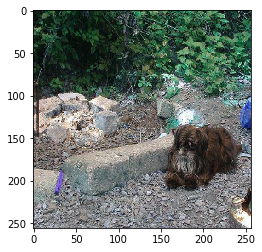

In [91]:
plt.imshow(x_train_data[0].squeeze(), cmap='gray')
plt.plot()

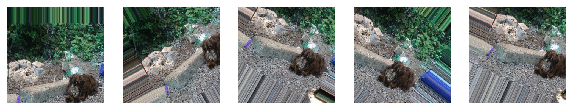

In [92]:
plt.figure(figsize=(10,8))
gen = train_generator.flow(x_train_data[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'), cmap='gray')
    plt.plot()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [93]:
model.fit_generator(train_generator.flow(x_train_data, y_train_data),
                    steps_per_epoch=x_train_data.shape[0],
                    epochs=2,
                    validation_data=(val_generator.flow(x_val_data, y_val_data)))

Epoch 1/2
   9/7155 [..............................] - ETA: 2:21:42 - loss: 8.2390 - accuracy: 0.0208

KeyboardInterrupt: ignored

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)

my_new_model = tf.keras.models.Sequential()
my_new_model.add(VGG16(weights=('/content/drive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg'))


Print the summary of the base_model

In [95]:
my_new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
#Adding custom Layers
my_new_model.add(tf.keras.layers.Flatten()) 
my_new_model.add(tf.keras.layers.Dense(1024, activation='relu'))
my_new_model.add(tf.keras.layers.Dropout(0.5)) 
my_new_model.add(tf.keras.layers.Dense(256, activation='relu'))
my_new_model.add(tf.keras.layers.Dense(120, activation='softmax'))


### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
# Say not to train first layer (VGG16) model. It is already trained
my_new_model.layers[0].trainable = False

my_new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
my_new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_4 (Dense)              (None, 120)               30840     
Total params: 15,533,240
Trainable params: 818,552
Non-trainable params: 14,714,688
____________________________________

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

In [99]:
my_new_model.fit(x_train_data,
                y_train_data,
                batch_size=128,
                epochs=10,
                validation_data=(x_val_data, y_val_data))

Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 438s 61ms/sample - loss: 5.2634 - accuracy: 0.0341 - val_loss: 4.1929 - val_accuracy: 0.1069
Epoch 2/10
7155/7155 [==============================] - 443s 62ms/sample - loss: 3.3975 - accuracy: 0.2008 - val_loss: 2.2858 - val_accuracy: 0.3981
Epoch 3/10
7155/7155 [==============================] - 439s 61ms/sample - loss: 2.1634 - accuracy: 0.4116 - val_loss: 1.7011 - val_accuracy: 0.5256
Epoch 4/10
7155/7155 [==============================] - 439s 61ms/sample - loss: 1.6504 - accuracy: 0.5340 - val_loss: 1.4974 - val_accuracy: 0.5739
Epoch 5/10
7155/7155 [==============================] - 438s 61ms/sample - loss: 1.4127 - accuracy: 0.5880 - val_loss: 1.4162 - val_accuracy: 0.5892
Epoch 6/10
7155/7155 [==============================] - 438s 61ms/sample - loss: 1.1879 - accuracy: 0.6436 - val_loss: 1.3985 - val_accuracy: 0.6022
Epoch 7/10
7155/7155 [==============================] - 43

In [101]:
my_new_model.evaluate(x_val_data, y_val_data)

3067/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.3055364446217126, 0.6286273]

In [0]:
# With more training and using data augmentation in transfer learning we can further increase the accuracy of the model.
# This will need more heavy compute resources.